In [1]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [13]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates=True)  # Date parsing, quite powerful in pandas

In [15]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


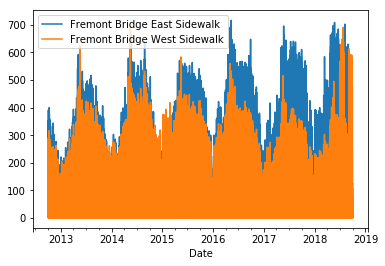

In [14]:
%matplotlib inline
data.plot()

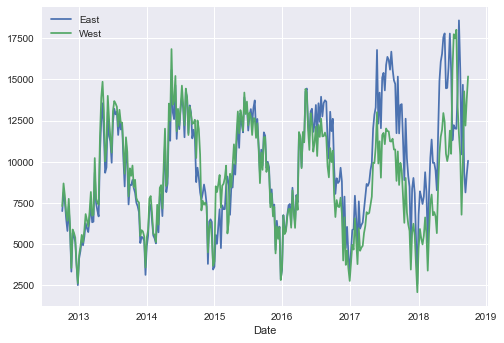

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['East', 'West']
data.resample('W').sum().plot()

(0, 618365.35)

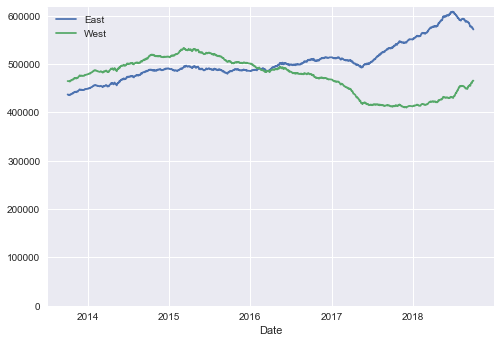

In [25]:
ax = data.resample('D').sum().rolling(365).sum().plot() #resample up-binning to do a daily/weekly/yearly resample
ax.set_ylim(0,None)

(0, 1080850.45)

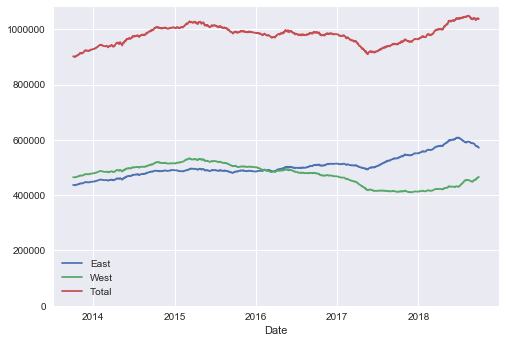

In [33]:
data['Total']=data['East']+data['West']
ax = data.resample('D').sum().rolling(365).sum().plot() #resample up-binning to do a daily/weekly/yearly resample
ax.set_ylim(0,None)

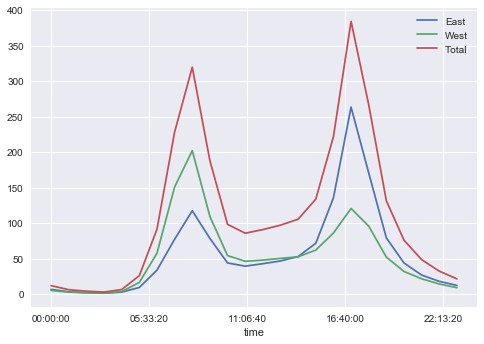

In [32]:
data.groupby(data.index.time).mean().plot()

In [34]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


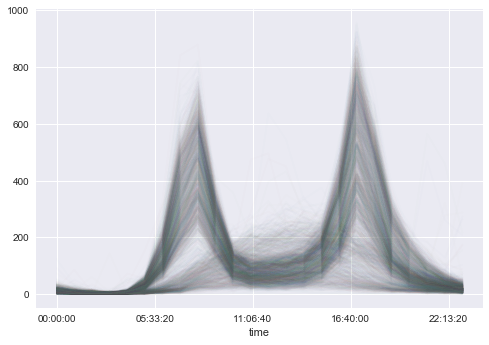

In [35]:
pivoted.plot(legend=False, alpha=0.01) #alpha degree of transparency

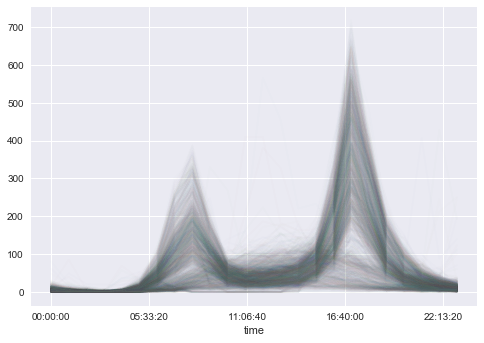

In [36]:
pivoted_east = data.pivot_table('East', index = data.index.time, columns = data.index.date)
pivoted_east.plot(legend=False, alpha=0.01) #alpha degree of transparency

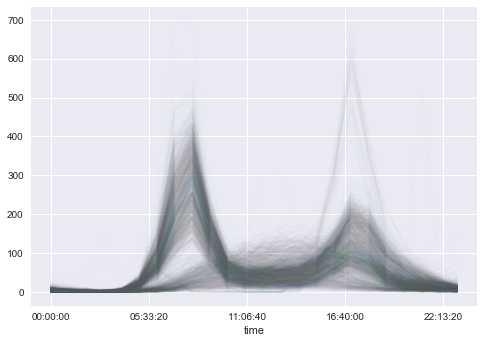

In [38]:
pivoted_west = data.pivot_table('West', index = data.index.time, columns = data.index.date) # pivot by date and index by time
pivoted_west.plot(legend=False, alpha=0.01) #alpha degree of transparency